In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import plotly.express as px
import seaborn as sns
import numpy as np


# Leer el archivo de la base de datos
df_bbdd = pd.read_csv('/content/drive/MyDrive/datasets/reportes_bbdd.csv')

#Leer el archivo de los registros de Agost+
df_agost = pd.read_csv('/content/drive/MyDrive/datasets/reportes_agost.csv')


In [ ]:
df_bbdd

,area,temp,hum,fecha,hora
0,1,20.58,43.06,01/07/24,15:00:04
1,2,19.83,46.58,01/07/24,15:00:10
2,2,20.18,61.25,01/07/24,9:00:08
3,1,21.45,68.23,01/07/24,9:01:28
4,2,21.06,42.51,02/07/24,15:00:02
...,...,...,...,...,...
119,2,20.56,54.07,30/7/2024,14:58:46
120,1,20.32,51.00,31/7/2024,15:01:57
121,2,20.31,50.06,31/7/2024,15:00:18
122,2,18.64,56.15,31/7/2024,8:59:22


In [ ]:
df_agost

,area,temp,hum,fecha
0,1,20.0,61,2024-07-02
1,1,19.5,47,2024-07-02
2,1,20.5,60,2024-07-03
3,1,21.0,45,2024-07-03
4,1,22.5,65,2024-07-04
...,...,...,...,...
91,2,20.0,51,2024-07-29
92,2,19.0,56,2024-07-30
93,2,20.5,54,2024-07-30
94,2,18.5,56,2024-07-31


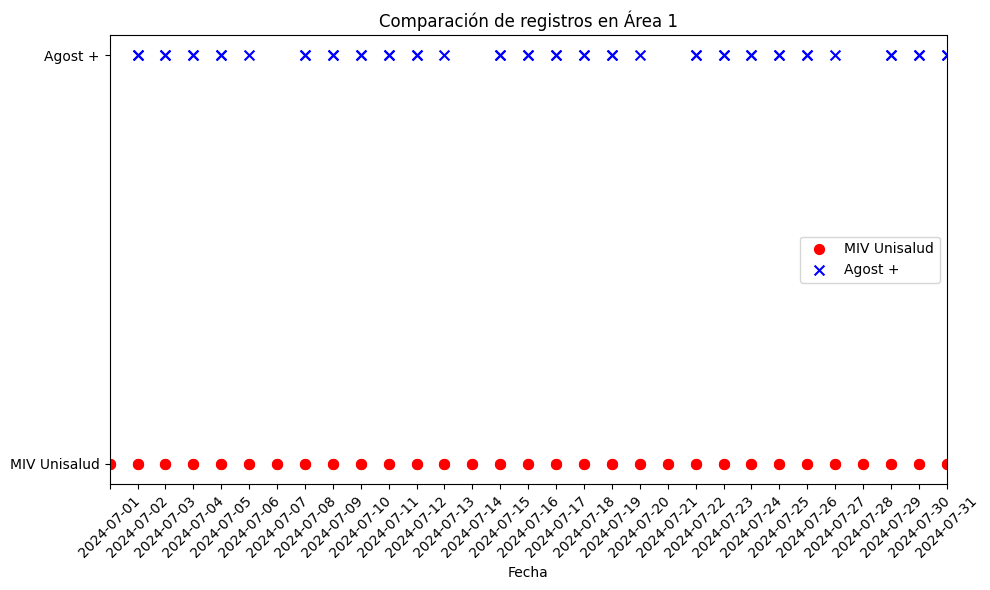

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import pandas as pd

# Convertir las fechas en df_bbdd al formato correcto (YYYY-MM-DD)
df_bbdd['fecha'] = pd.to_datetime(df_bbdd['fecha'], format='%Y-%m-%d', errors='coerce')

# Convertir las fechas en df_agost al formato YYYY-MM-DD
df_agost['fecha'] = pd.to_datetime(df_agost['fecha'], format='%Y-%m-%d', errors='coerce')

# Filtrar por área si es necesario
area_a_comparar = 1
df_bbdd_area = df_bbdd[df_bbdd['area'] == area_a_comparar]
df_agost_area = df_agost[df_agost['area'] == area_a_comparar]

# Asegurar que los valores de fecha estén completos y correctos
df_bbdd_area = df_bbdd_area.dropna(subset=['fecha'])
df_agost_area = df_agost_area.dropna(subset=['fecha'])

# Crear la figura y el subplot
fig, ax = plt.subplots(figsize=(10, 6))

# Ajustar el rango del eje X al rango de fechas de df_bbdd
x_min, x_max = df_bbdd_area['fecha'].min(), df_bbdd_area['fecha'].max()
ax.set_xlim(x_min, x_max)

# Graficar los puntos de df_bbdd_area
ax.scatter(df_bbdd_area['fecha'], [1]*len(df_bbdd_area), label='MIV Unisalud', color='red', marker='o', s=50)

# Graficar los puntos de df_agost_area solo si están dentro del rango de fechas de df_bbdd
df_agost_area_filtered = df_agost_area[(df_agost_area['fecha'] >= x_min) & (df_agost_area['fecha'] <= x_max)]
if not df_agost_area_filtered.empty:
    ax.scatter(df_agost_area_filtered['fecha'], [1.5]*len(df_agost_area_filtered), label='Agost +', color='blue', marker='x', s=50)

# Personalización del gráfico
ax.set_yticks([1, 1.5])
ax.set_yticklabels(['MIV Unisalud', 'Agost +'])
ax.set_title(f'Comparación de registros en Área {area_a_comparar}')
ax.set_xlabel('Fecha')

# Formatear el eje X para mostrar todos los días
ax.xaxis.set_major_locator(mdates.DayLocator())
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
plt.xticks(rotation=45)

# Añadir leyenda solo si hay datos
if not df_bbdd_area.empty or not df_agost_area_filtered.empty:
    ax.legend(loc='best')

# Ajustar el layout
plt.tight_layout()
plt.show()


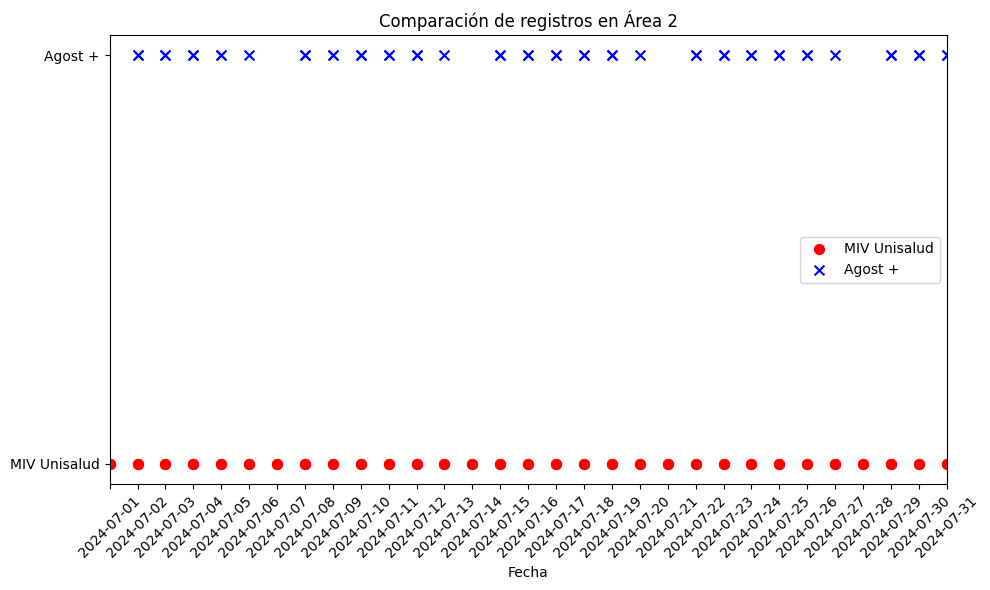

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import pandas as pd

# Convertir las fechas en df_bbdd al formato correcto (YYYY-MM-DD)
df_bbdd['fecha'] = pd.to_datetime(df_bbdd['fecha'], format='%Y-%m-%d', errors='coerce')

# Convertir las fechas en df_agost al formato YYYY-MM-DD
df_agost['fecha'] = pd.to_datetime(df_agost['fecha'], format='%Y-%m-%d', errors='coerce')

# Filtrar por área si es necesario
area_a_comparar = 2
df_bbdd_area = df_bbdd[df_bbdd['area'] == area_a_comparar]
df_agost_area = df_agost[df_agost['area'] == area_a_comparar]

# Asegurar que los valores de fecha estén completos y correctos
df_bbdd_area = df_bbdd_area.dropna(subset=['fecha'])
df_agost_area = df_agost_area.dropna(subset=['fecha'])

# Crear la figura y el subplot
fig, ax = plt.subplots(figsize=(10, 6))

# Ajustar el rango del eje X al rango de fechas de df_bbdd
x_min, x_max = df_bbdd_area['fecha'].min(), df_bbdd_area['fecha'].max()
ax.set_xlim(x_min, x_max)

# Graficar los puntos de df_bbdd_area
ax.scatter(df_bbdd_area['fecha'], [1]*len(df_bbdd_area), label='MIV Unisalud', color='red', marker='o', s=50)

# Graficar los puntos de df_agost_area solo si están dentro del rango de fechas de df_bbdd
df_agost_area_filtered = df_agost_area[(df_agost_area['fecha'] >= x_min) & (df_agost_area['fecha'] <= x_max)]
if not df_agost_area_filtered.empty:
    ax.scatter(df_agost_area_filtered['fecha'], [1.5]*len(df_agost_area_filtered), label='Agost +', color='blue', marker='x', s=50)

# Personalización del gráfico
ax.set_yticks([1, 1.5])
ax.set_yticklabels(['MIV Unisalud', 'Agost +'])
ax.set_title(f'Comparación de registros en Área {area_a_comparar}')
ax.set_xlabel('Fecha')

# Formatear el eje X para mostrar todos los días
ax.xaxis.set_major_locator(mdates.DayLocator())
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
plt.xticks(rotation=45)

# Añadir leyenda solo si hay datos
if not df_bbdd_area.empty or not df_agost_area_filtered.empty:
    ax.legend(loc='best')

# Ajustar el layout
plt.tight_layout()
plt.show()
